# Question 3: III. How do offered salaries compare to the prevailing wage?
> 	Are there job sub-categories that tend to get over-paid or under-paid?
> 	Are there companies that tend to over-pay or under-pay?
> 	Will the answer change if I take standard of living into account?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#As we're working with salaries here, decided to limit numbers to 2 decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
salary_df = pd.read_excel('salary_data_states.xlsx')

In [3]:
salary_df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_STATE_ABBREVIATION',
       'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS',
       'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP',
       'order'],
      dtype='object')

For the first part of the question, useful columns would be JOB_TITLE_SUBGROUP, JOB_TITLE, and the difference between PREVAILING_WAGE_SUBMITTED and PAID_WAGE_SUBMITTED. Prevailing wage is the expected wage for a position, while the paid wage it what is actually offered and accepted after negotiations. Job title subgroup contains broader terms (such as business analyst), which we will be restricting to business analyst, data analyst, data scientist, management consultant, software engineer.

In [4]:
salary_df['JOB_TITLE_SUBGROUP'].value_counts()

software engineer        99364
business analyst         27811
assistant professor      18866
teacher                  13912
data analyst              3840
attorney                  1488
data scientist            1227
management consultant      770
Name: JOB_TITLE_SUBGROUP, dtype: int64

In [5]:
#filtering the salary df by relevant categories
jobs_df = salary_df.filter(['JOB_TITLE_SUBGROUP', 'JOB_TITLE', 'PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED'])

Now that we have filtered our data set, it is time to do some actual analysis!

In [15]:
#These are the only jobs we are interested in
options = ['software engineer', 'business analyst', 'data analyst', 'data scientist', 'management consultant']

#filtering by certain jobs in job title subgroup
df = jobs_df[jobs_df['JOB_TITLE_SUBGROUP'].isin(options)]

print(df)

       JOB_TITLE_SUBGROUP                            JOB_TITLE  \
0       software engineer                    SOFTWARE ENGINEER   
4       software engineer             SENIOR SOFTWARE ENGINEER   
5        business analyst  ORACLE SCM ANALYST/BUSINESS ANALYST   
6       software engineer             SENIOR SOFTWARE ENGINEER   
7       software engineer                    SOFTWARE ENGINEER   
...                   ...                                  ...   
167015  software engineer           SOFTWARE ENGINEER & TESTER   
167052   business analyst                     BUSINESS ANALYST   
167053   business analyst                     BUSINESS ANALYST   
167115       data analyst                         DATA ANALYST   
167233   business analyst          ENTERPRISE BUSINESS ANALYST   

        PREVAILING_WAGE_SUBMITTED  PAID_WAGE_SUBMITTED  
0                      6217100.00             62171.00  
4                        84573.00            170000.00  
5                       113610.00   

In [19]:
#check for empty values
df.isna().sum()

JOB_TITLE_SUBGROUP           0
JOB_TITLE                    0
PREVAILING_WAGE_SUBMITTED    0
PAID_WAGE_SUBMITTED          0
dtype: int64

In [16]:
#get an idea on the actual values
df.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED
count,133012.00,133012.00
mean,76659.65,84230.42
std,33625.90,33568.01
min,8.00,10.00
25%,60611.00,65000.00
50%,74651.00,80000.00
75%,93662.00,102486.04
max,6217100.00,1400000.00


There are clearly some outliers here in salary, so lets figure out what they are. Although the IQR is depicted above, we should write code that will calculate it instead of copy-pasting.

In [25]:
Q1 = df['PREVAILING_WAGE_SUBMITTED'].quantile(0.25)
Q3 = df['PREVAILING_WAGE_SUBMITTED'].quantile(0.75)
IQR = Q3 - Q1
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

print(Lower_Fence)
print(Upper_Fence)

11034.5
143238.5


In [26]:
Q1a = df['PAID_WAGE_SUBMITTED'].quantile(0.25)
Q3a = df['PAID_WAGE_SUBMITTED'].quantile(0.75)
IQRa = Q3 - Q1
Lower_Fence_a = Q1 - (1.5 * IQR)
Upper_Fence_a = Q3 + (1.5 * IQR)

print(Lower_Fence_a)
print(Upper_Fence_a)

11034.5
143238.5


Although the above code is pretty ugly, both results are the same, so that makes life a little easier. We can use those fences to exclude any outliers. Time to filter more and make a graph:

<AxesSubplot:>

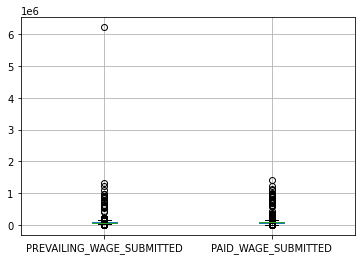

In [27]:
#current data with outliers graph
df.boxplot(column = ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED'])

so ugly! let's filter that set

fdf = df[(df['PREVAILING_WAGE_SUBMITTED'] >= Lower_Fence) &
        df['PREVAILING_WAGE_SUBMITTED'] <= Upper_Fence]
print(fdf)

In [59]:
fdf = df[(df['PREVAILING_WAGE_SUBMITTED'] >= Lower_Fence) &
        (df['PREVAILING_WAGE_SUBMITTED'] <= Upper_Fence) &
        (df['PAID_WAGE_SUBMITTED'] >= Lower_Fence) &
        (df['PAID_WAGE_SUBMITTED'] <= Upper_Fence)]

#fdf2 = df[(df['PAID_WAGE_SUBMITTED'] >= Lower_Fence) &
      #  (df['PAID_WAGE_SUBMITTED'] <= Upper_Fence)]
print(fdf)

       JOB_TITLE_SUBGROUP                            JOB_TITLE  \
5        business analyst  ORACLE SCM ANALYST/BUSINESS ANALYST   
7       software engineer                    SOFTWARE ENGINEER   
9       software engineer                    SOFTWARE ENGINEER   
10      software engineer                SR. SOFTWARE ENGINEER   
12      software engineer                    SOFTWARE ENGINEER   
...                   ...                                  ...   
167012       data analyst                         DATA ANALYST   
167013   business analyst                     BUSINESS ANALYST   
167014  software engineer           SOFTWARE ENGINEER & TESTER   
167015  software engineer           SOFTWARE ENGINEER & TESTER   
167115       data analyst                         DATA ANALYST   

        PREVAILING_WAGE_SUBMITTED  PAID_WAGE_SUBMITTED  
5                       113610.00            114421.00  
7                       104458.00            104458.00  
9                        98675.00   

AttributeError: 'DataFrame' object has no attribute 'scatterplot'

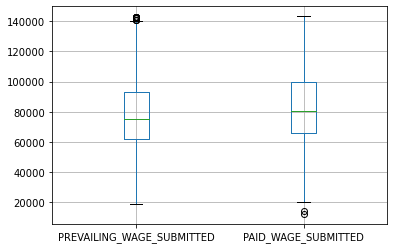

In [62]:
#fig, ax = plt.subplots()

fdf.boxplot(column = ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED'])
